In [10]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn import preprocessing
import matplotlib.pyplot as plt

#Loading data
df = pd.read_csv('D:\AI-ML\malware_detection.csv')
df

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,ping,0.000,5.000,0.000,10.0,1.030,164.64,146.36,0.61,2.72,58266.0,26.43,85861,111.667,19973.0,2060667,0
1,curl,0.014,5.000,0.601,14.0,0.072,317.32,255.84,18.07,0.18,135878.0,7.95,75561,86.263,13152.0,2119754,0
2,top,0.005,0.219,0.060,6.0,0.071,247.85,266.19,11.33,0.24,104448.0,3.49,54497,106.584,4657.0,1781822,0
3,unzip,0.001,0.717,0.000,16.0,0.012,2346.59,2664.54,79.12,0.34,93458.0,14.89,97912,73.217,7863.0,2349887,0
4,system-monitor,0.182,11.000,0.181,4.0,1.527,60.68,48.13,0.88,0.69,289124.0,2.14,87246,23.621,19071.0,2140178,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Smart Swipe,0.337,1.000,0.000,49.0,1.054,149.29,125.43,1.00,1.50,100617.0,11.06,95818,123.367,15136.0,2299597,1
66,Free WiFi Connect,0.038,0.204,0.020,18.0,1.496,61.99,47.42,1.04,0.60,321071.0,3.94,95535,31.285,13880.0,2356069,1
67,San Andreas City Craft,0.001,0.781,0.000,40.0,0.314,381.38,314.04,3.05,1.25,93834.0,13.17,94456,119.862,12337.0,2266964,1
68,Drawing Lessons Angry Birds,0.630,0.000,0.000,44.0,0.165,803.32,664.66,6.28,1.28,102347.0,12.31,93360,108.567,13169.0,2240652,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   name                             70 non-null     object 
 1   cpu-usage                        70 non-null     float64
 2   context-switch                   70 non-null     float64
 3   cpu-migration                    70 non-null     float64
 4   page-faults                      70 non-null     float64
 5   cycles-GHz                       70 non-null     float64
 6   stalled-cycles-frontend-percent  70 non-null     float64
 7   stalled-cycles-backend-percent   70 non-null     float64
 8   Instructions-per-cycle           70 non-null     float64
 9   stalled-cycles-per-instruction   70 non-null     float64
 10  branches                         70 non-null     float64
 11  branch-misses-percent            70 non-null     float64
 12  bus-cycle               

In [3]:
df.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,ping,0.000,5.000,0.000,10.0,1.030,164.64,146.36,0.61,2.72,58266.0,26.43,85861,111.667,19973.0,2060667,0
1,curl,0.014,5.000,0.601,14.0,0.072,317.32,255.84,18.07,0.18,135878.0,7.95,75561,86.263,13152.0,2119754,0
2,top,0.005,0.219,0.060,6.0,0.071,247.85,266.19,11.33,0.24,104448.0,3.49,54497,106.584,4657.0,1781822,0
3,unzip,0.001,0.717,0.000,16.0,0.012,2346.59,2664.54,79.12,0.34,93458.0,14.89,97912,73.217,7863.0,2349887,0
4,system-monitor,0.182,11.000,0.181,4.0,1.527,60.68,48.13,0.88,0.69,289124.0,2.14,87246,23.621,19071.0,2140178,0


In [4]:
df.tail()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
65,Smart Swipe,0.337,1.000,0.00,49.0,1.054,149.29,125.43,1.00,1.50,100617.0,11.06,95818,123.367,15136.0,2299597,1
66,Free WiFi Connect,0.038,0.204,0.02,18.0,1.496,61.99,47.42,1.04,0.60,321071.0,3.94,95535,31.285,13880.0,2356069,1
67,San Andreas City Craft,0.001,0.781,0.00,40.0,0.314,381.38,314.04,3.05,1.25,93834.0,13.17,94456,119.862,12337.0,2266964,1
68,Drawing Lessons Angry Birds,0.630,0.000,0.00,44.0,0.165,803.32,664.66,6.28,1.28,102347.0,12.31,93360,108.567,13169.0,2240652,1
69,Temple Crash Jungle Bandicoot,0.001,9.000,0.00,9.0,1.047,148.52,128.07,0.95,1.56,86291.0,13.61,89078,112.547,19866.0,2137934,1


In [6]:
df.shape

(70, 17)

In [8]:
df.describe()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,7.000000e+01,70.000000
mean,0.224857,3.268829,0.200843,22.632400,0.703786,1190.133143,2398.515143,45.230571,0.829714,161444.605486,7.145571,78221.285714,70.325429,13201.262757,1.985734e+06,0.171429
std,0.263227,5.304954,0.318326,19.539722,0.497743,7444.910196,17575.281223,312.370354,0.715005,98600.462833,5.631135,20085.880317,35.977729,5375.939327,3.860305e+05,0.379604
min,0.000000,0.000000,0.000000,0.110000,0.000000,11.070000,12.870000,0.160000,0.070000,182.384000,0.530000,24367.000000,8.980000,13.393000,8.443950e+05,0.000000
25%,0.010250,0.733000,0.000000,8.250000,0.213250,56.160000,43.905000,0.907500,0.422500,93552.000000,2.717500,68212.000000,34.542750,11308.500000,1.786604e+06,0.000000
50%,0.134000,2.000000,0.099500,15.000000,0.793000,140.485000,107.915000,1.335000,0.645000,138971.000000,6.010000,84719.500000,75.459000,13507.000000,2.114808e+06,0.000000
75%,0.363000,4.000000,0.203000,33.000000,1.065500,303.150000,266.022500,4.817500,0.970000,212997.250000,11.165000,93978.000000,106.531000,15498.250000,2.281833e+06,0.000000
max,1.099000,37.000000,2.000000,90.000000,1.664000,62414.160000,147267.450000,2617.310000,4.860000,558519.000000,26.430000,98792.000000,129.192000,28428.000000,2.370923e+06,1.000000


In [12]:
df = df.drop('name',1)

In [13]:
df

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,0.000,5.000,0.000,10.0,1.030,164.64,146.36,0.61,2.72,58266.0,26.43,85861,111.667,19973.0,2060667,0
1,0.014,5.000,0.601,14.0,0.072,317.32,255.84,18.07,0.18,135878.0,7.95,75561,86.263,13152.0,2119754,0
2,0.005,0.219,0.060,6.0,0.071,247.85,266.19,11.33,0.24,104448.0,3.49,54497,106.584,4657.0,1781822,0
3,0.001,0.717,0.000,16.0,0.012,2346.59,2664.54,79.12,0.34,93458.0,14.89,97912,73.217,7863.0,2349887,0
4,0.182,11.000,0.181,4.0,1.527,60.68,48.13,0.88,0.69,289124.0,2.14,87246,23.621,19071.0,2140178,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.337,1.000,0.000,49.0,1.054,149.29,125.43,1.00,1.50,100617.0,11.06,95818,123.367,15136.0,2299597,1
66,0.038,0.204,0.020,18.0,1.496,61.99,47.42,1.04,0.60,321071.0,3.94,95535,31.285,13880.0,2356069,1
67,0.001,0.781,0.000,40.0,0.314,381.38,314.04,3.05,1.25,93834.0,13.17,94456,119.862,12337.0,2266964,1
68,0.630,0.000,0.000,44.0,0.165,803.32,664.66,6.28,1.28,102347.0,12.31,93360,108.567,13169.0,2240652,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cpu-usage                        70 non-null     float64
 1   context-switch                   70 non-null     float64
 2   cpu-migration                    70 non-null     float64
 3   page-faults                      70 non-null     float64
 4   cycles-GHz                       70 non-null     float64
 5   stalled-cycles-frontend-percent  70 non-null     float64
 6   stalled-cycles-backend-percent   70 non-null     float64
 7   Instructions-per-cycle           70 non-null     float64
 8   stalled-cycles-per-instruction   70 non-null     float64
 9   branches                         70 non-null     float64
 10  branch-misses-percent            70 non-null     float64
 11  bus-cycle                        70 non-null     int64  
 12  cache-misses-percent    

In [35]:
df= df.sample(frac=1).reset_index(drop=True)

In [36]:
df.head()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,0.001,1.0,0.000,46.0,1.008,131.60,105.05,1.35,0.97,137904.0,10.46,96398,101.263,14631.0,2313557,0
1,0.883,1.0,0.124,15.0,0.003,1852.55,2496.88,85.32,0.29,35031.0,0.57,24367,8.980,3601.0,877674,0
2,0.755,3.0,0.164,16.0,0.029,293.22,262.39,12.51,0.23,47395.0,1.08,35526,61.085,6970.0,1301211,0
3,0.370,5.0,0.467,15.0,1.354,63.32,51.43,0.74,0.86,198348.0,3.05,78884,41.534,19218.0,1925909,0
4,0.882,4.0,0.300,33.0,0.012,11.07,12.87,0.59,0.22,48230.0,1.19,25984,40.036,5538.0,844395,0


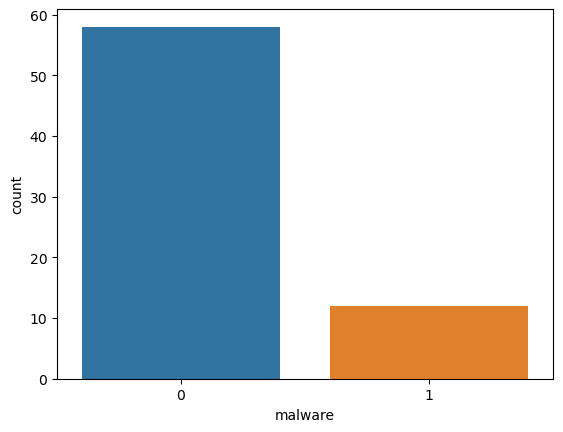

In [37]:
sns.countplot(x='malware',data=df)
plt.show()

In [38]:
target_count= df.malware.value_counts()
print('Class 0:',target_count[0])
print('Class 1:',target_count[1])

Class 0: 58
Class 1: 12


In [39]:
count_class_0 ,count_class_1 = df.malware.value_counts()


In [40]:
df_class_0 = df[df['malware']==0]
df_class_1 = df[df['malware']==1]

In [41]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat ([df_class_0,df_class_1_over],axis=0)

In [42]:
df_test_over.shape

(116, 16)

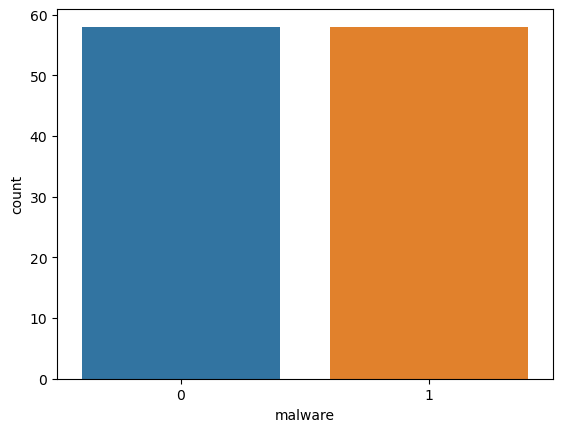

In [43]:
sns.countplot(x='malware',data=df_test_over)
plt.show()

In [44]:
x = df_test_over.iloc[:,df_test_over.columns!='malware']
y = df_test_over.iloc[:,df_test_over.columns=='malware']

In [45]:
x.head()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
0,0.001,1.0,0.000,46.0,1.008,131.60,105.05,1.35,0.97,137904.0,10.46,96398,101.263,14631.0,2313557
1,0.883,1.0,0.124,15.0,0.003,1852.55,2496.88,85.32,0.29,35031.0,0.57,24367,8.980,3601.0,877674
2,0.755,3.0,0.164,16.0,0.029,293.22,262.39,12.51,0.23,47395.0,1.08,35526,61.085,6970.0,1301211
3,0.370,5.0,0.467,15.0,1.354,63.32,51.43,0.74,0.86,198348.0,3.05,78884,41.534,19218.0,1925909
4,0.882,4.0,0.300,33.0,0.012,11.07,12.87,0.59,0.22,48230.0,1.19,25984,40.036,5538.0,844395


In [46]:
from sklearn.utils import shuffle

In [47]:
x, y = shuffle(x,y)

In [49]:
x.head()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
61,0.015,4.000,0.453,2.00,0.046,201.94,296.21,9.03,0.33,70431.0,5.87,33153,117.662,4934.0,1321994
28,1.099,0.130,0.052,0.11,0.447,71.78,79.23,0.16,4.86,24759.0,2.11,45507,92.371,8874.0,1093187
50,0.001,0.781,0.000,40.00,0.314,381.38,314.04,3.05,1.25,93834.0,13.17,94456,119.862,12337.0,2266964
25,0.142,3.000,0.291,3.00,0.956,59.38,48.31,0.62,0.96,127285.0,6.22,82793,35.262,13551.0,2042454
43,0.001,4.000,0.698,20.00,0.538,164.53,149.01,2.98,0.55,184041.0,7.78,94545,107.235,14219.0,2269099


In [50]:
y.head()

,malware
61,0
28,1
50,1
25,0
43,0


In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [52]:
bestfeatures = SelectKBest(score_func = chi2,k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [53]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.nlargest(10,'Score')

,Specs,Score
9,branches,1.119491e+06
14,ref-cycles,4.903153e+05
6,stalled-cycles-backend-percent,1.244734e+05
11,bus-cycle,5.996392e+04
5,stalled-cycles-frontend-percent,3.877256e+04
13,cache-references,5.757774e+03
7,Instructions-per-cycle,2.758936e+03
12,cache-misses-percent,4.582847e+02
3,page-faults,2.088865e+02
10,branch-misses-percent,1.089414e+02


In [54]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

[0.08105183 0.0313112  0.02832325 0.06846462 0.03706727 0.02447478
 0.02851467 0.028924   0.20727719 0.0735036  0.15879111 0.05914505
 0.08993765 0.03093153 0.05228225]


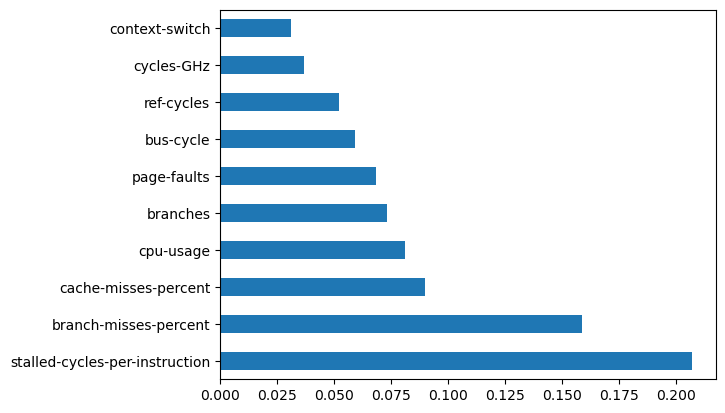

In [59]:
model.fit(x,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_,index = x.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

<Axes: >

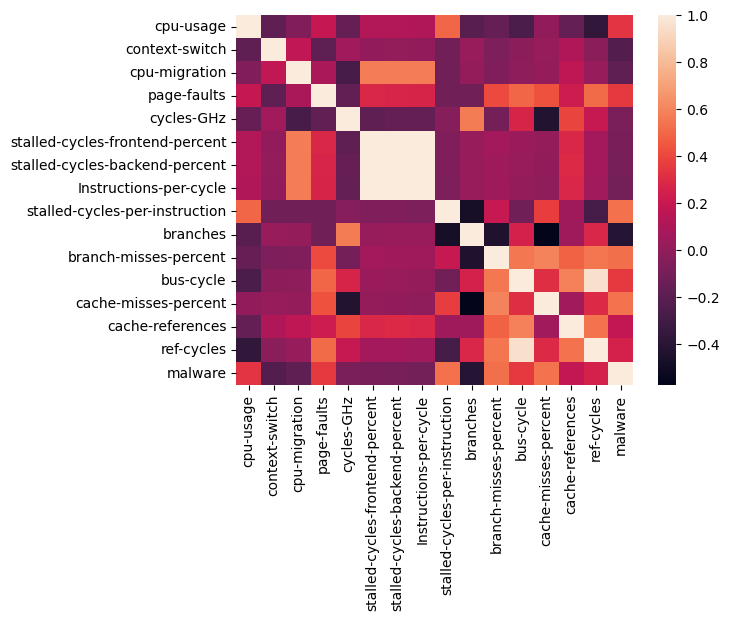

In [61]:
corr = df_test_over.corr()

sns.heatmap(corr,
            xticklabels = corr.columns,
            yticklabels = corr.columns)


In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [78]:
x_train.shape

(92, 15)

In [79]:
x_train.head()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
11,0.106,2.0,0.150,0.158,0.915,58.20,39.07,0.85,0.69,140291.0,1.34,92480,48.854,24849.0,2219658
35,0.000,8.0,0.709,48.000,0.435,306.47,244.08,2.93,1.05,133311.0,9.37,90670,100.445,15271.0,2176086
4,0.882,4.0,0.300,33.000,0.012,11.07,12.87,0.59,0.22,48230.0,1.19,25984,40.036,5538.0,844395
64,0.174,0.0,0.000,19.000,0.867,147.94,126.28,0.96,1.54,65102.0,19.76,86649,78.975,18742.0,2079722
38,0.133,2.0,0.097,3.000,1.229,54.41,43.67,0.90,0.61,208990.0,2.70,83089,33.595,11350.0,1832390


In [80]:
y_train.head()

,malware
11,0
35,0
4,0
64,1
38,0


In [81]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [82]:
from sklearn import svm
support = svm.LinearSVC(random_state=20)

In [83]:
support.fit(x_train,y_train)

LinearSVC(random_state=20)

In [84]:
y_pred = support.predict(x_test)

In [85]:
model1 = metrics.accuracy_score(y_test,y_pred)
model1

0.2916666666666667

In [89]:
cnf_matrics = confusion_matrix(y_test,y_pred)

<Axes: >

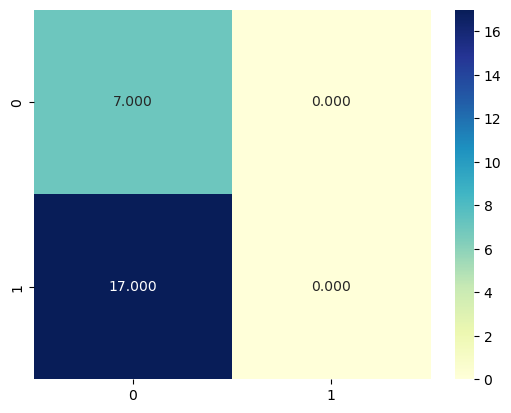

In [94]:
labels = [0,1]
sns.heatmap(cnf_matrics,annot =True,cmap = 'YlGnBu',fmt='.3f',xticklabels=labels,yticklabels=labels)

In [95]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [96]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [97]:
y_pred = tree.predict(x_test)

In [99]:
model2=metrics.accuracy_score(y_test,y_pred)
model2

1.0

In [100]:
cnf_matrix = confusion_matrix(y_test,y_pred)

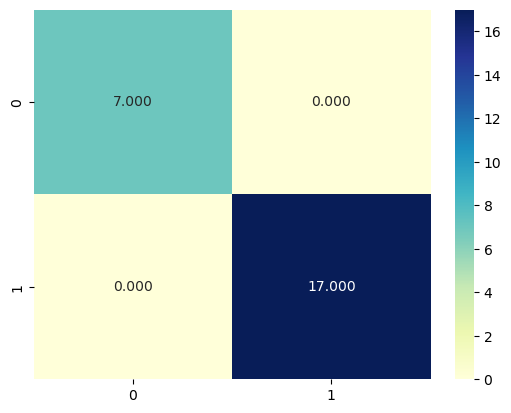

In [101]:
sns.heatmap(cnf_matrix,annot =True,cmap = 'YlGnBu',fmt='.3f',xticklabels=labels,yticklabels=labels)
plt.show()